In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx
/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_infertility.csv
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai606_19.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai260_9.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai96_4.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai274_7.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai70_17.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai299_14.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai149_8.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai250_16.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai105_7.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/img_0_3352.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai233_9.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai164_19.jpg
/kaggle/input/pcod-ultrasound-images/PCOS/infected/ai36_19.jpg
/kaggle/input/pcod-ultrasound

In [2]:
train="/kaggle/input/pcos-detection-using-ultrasound-images/data/train"
test="/kaggle/input/pcos-detection-using-ultrasound-images/data/test"


Displaying images from: train/infected


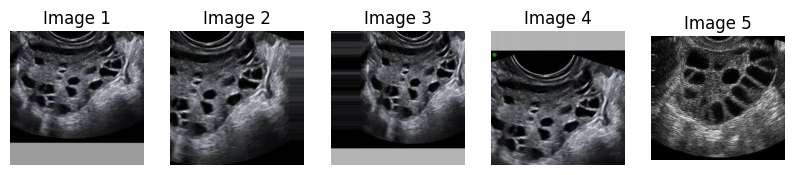


Displaying images from: train/notinfected


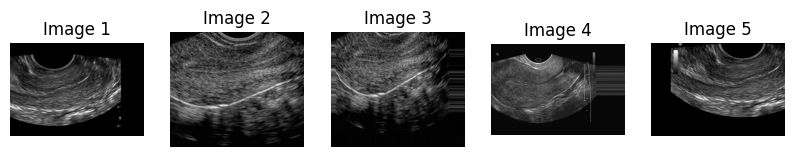


Displaying images from: test/infected


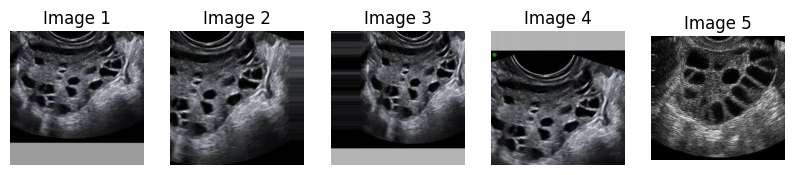


Displaying images from: test/notinfected


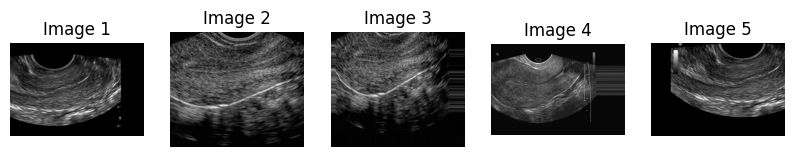

In [3]:
import os
import matplotlib.pyplot as plt
import cv2

# Path to the root directory
root_dir = "/kaggle/input/pcos-detection-using-ultrasound-images/data/"

# Function to display first five images from each subfolder
def display_images(subfolder):
    image_paths = []
    
    # Get list of images in the folder
    for root, _, files in os.walk(subfolder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
                if len(image_paths) == 5:
                    break

    # Display images
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')

    plt.show()

# Viewing first five images from each subfolder
for category in ['train/infected', 'train/notinfected', 'test/infected', 'test/notinfected']:
    print(f"\nDisplaying images from: {category}")
    display_images(os.path.join(root_dir, category))


In [4]:
import os
import shutil
from PIL import Image

# Original (read-only) directory
input_dir = "/kaggle/input/pcos-detection-using-ultrasound-images/data/"

# Writable directory
output_dir = "/kaggle/working/cleaned_data/"

# Function to check if a file is a valid image
def is_valid_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()
        return True
    except Exception:
        return False

# Copy the dataset to a writable directory
if not os.path.exists(output_dir):
    shutil.copytree(input_dir, output_dir)
    print("Data copied to writable directory.")

# Cleaning the copied dataset
for root, _, files in os.walk(output_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if not is_valid_image(file_path):
            print(f"Removing invalid file: {file_path}")
            os.remove(file_path)

print("Cleanup complete. All non-image files removed from the copied dataset.")


Data copied to writable directory.
Removing invalid file: /kaggle/working/cleaned_data/test/infected/WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg
Removing invalid file: /kaggle/working/cleaned_data/test/infected/WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg
Removing invalid file: /kaggle/working/cleaned_data/test/infected/OIP.jpg
Removing invalid file: /kaggle/working/cleaned_data/test/infected/WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg
Removing invalid file: /kaggle/working/cleaned_data/test/infected/R.jpg
Removing invalid file: /kaggle/working/cleaned_data/test/infected/WhatsApp Image 2022-04-01 at 3.50.20 PM.jpeg
Removing invalid file: /kaggle/working/cleaned_data/test/notinfected/WhatsApp Image 2022-04-01 at 3.35.25 PM.jpeg
Removing invalid file: /kaggle/working/cleaned_data/test/notinfected/WhatsApp Image 2022-04-01 at 3.39.07 PM.jpeg
Removing invalid file: /kaggle/working/cleaned_data/test/notinfected/img_0_7.jpg
Removing invalid file: /kaggle/working/cleaned_data/test/notinfect

In [6]:
import os

train_infected = "/kaggle/working/cleaned_data/train/infected"
train_notinfected = "/kaggle/working/cleaned_data/train/notinfected"

infected_count = len(os.listdir(train_infected))
notinfected_count = len(os.listdir(train_notinfected))

print(f"Number of files in infected directory: {infected_count}")
print(f"Number of files in notinfected directory: {notinfected_count}")


Number of files in infected directory: 781
Number of files in notinfected directory: 1143


2025-05-19 17:17:22.064474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747675042.212671      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747675042.255333      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1540 images belonging to 2 classes.
Found 384 images belonging to 2 classes.
Found 1922 images belonging to 2 classes.
Data generators reinitialized successfully with cleaned data!


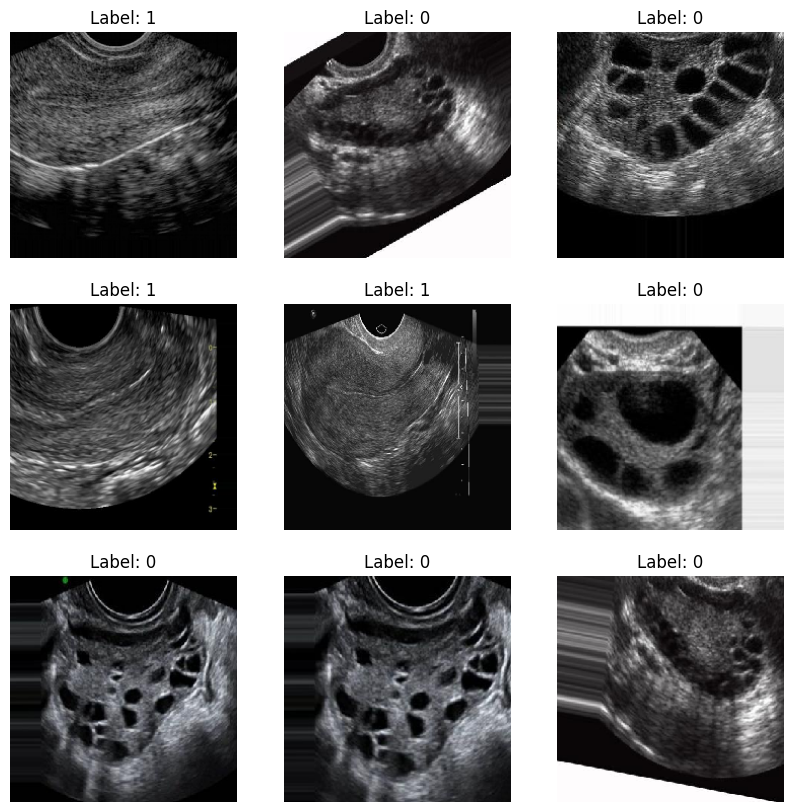

{'infected': 0, 'notinfected': 1}


In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Image dimensions
image_size = (224, 224)
batch_size = 32

# Image data generator with normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train and validation data generators
train_generator = datagen.flow_from_directory(
    directory=os.path.join(output_dir, "train"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    directory=os.path.join(output_dir, "train"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Test data generator
test_generator = datagen.flow_from_directory(
    directory=os.path.join(output_dir, "test"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

print("Data generators reinitialized successfully with cleaned data!")

x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Label: {int(y_batch[i])}")
    plt.axis('off')
plt.show()

print(train_generator.class_indices)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the CNN architecture
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Flatten and Fully Connected Layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747675807.419200      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747675807.419858      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Precision']
)


In [10]:
# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('pcos_model_best.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747675840.825829     134 service.cc:148] XLA service 0x790080024f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747675840.826650     134 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747675840.826677     134 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747675841.367486     134 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/49 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - Precision: 0.5543 - loss: 4.8726 

I0000 00:00:1747675848.565897     134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - Precision: 0.8181 - loss: 6.6751 - val_Precision: 0.6064 - val_loss: 51.5189
Epoch 2/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - Precision: 0.9927 - loss: 0.0505 - val_Precision: 0.5938 - val_loss: 96.8013
Epoch 3/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - Precision: 0.9910 - loss: 0.0981 - val_Precision: 0.5938 - val_loss: 72.6556
Epoch 4/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - Precision: 0.9943 - loss: 0.0289 - val_Precision: 0.6016 - val_loss: 56.6446
Epoch 5/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - Precision: 0.9998 - loss: 0.0050 - val_Precision: 0.6230 - val_loss: 45.8877
Epoch 6/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - Precision: 1.0000 - loss: 0.0077 - val_Precision: 0.6423 - val_loss: 36.2420
Epoch 7/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - Precision: 1.0000 - loss: 0.0028 - val_Precision: 0.7170 - val_loss: 16.5842
Epoch 8/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - Precision: 1.0000 - loss: 0.0016 - val_Prec

In [11]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - Precision: 1.0000 - loss: 1.9518e-18
Validation Accuracy: 100.00%
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - Precision: 0.6129 - loss: 6.4663e-04
Test Accuracy: 100.00%


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       781
           1       1.00      1.00      1.00      1141

    accuracy                           1.00      1922
   macro avg       1.00      1.00      1.00      1922
weighted avg       1.00      1.00      1.00      1922



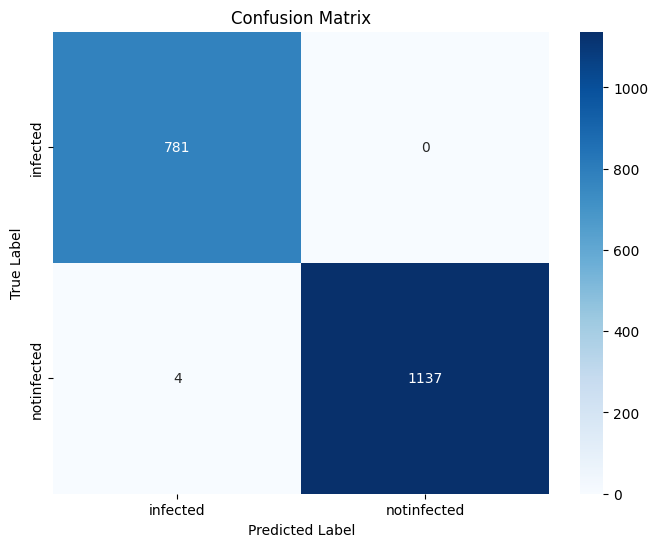

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for the test set
y_pred = model.predict(test_generator)

y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_1d = y_pred.astype(int).flatten()
# Get the true labels from the generator
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_1d)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_1d))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [20]:
model.save('pcos_detection_model.h5')
print("Model saved successfully!")


Model saved successfully!


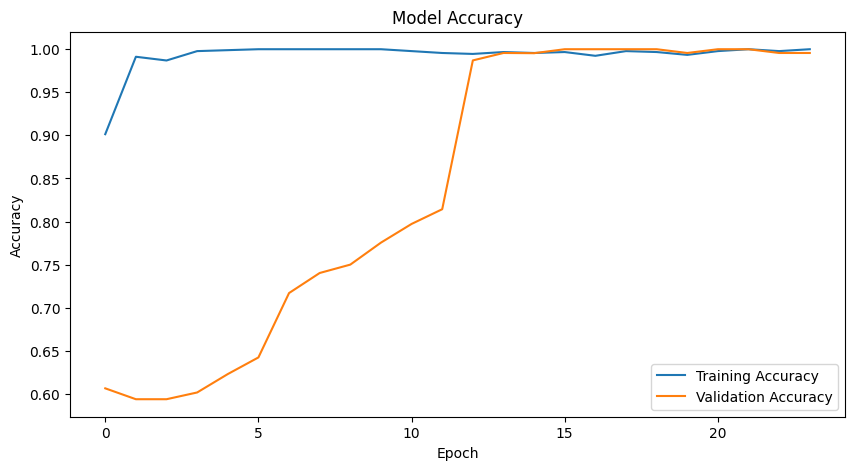

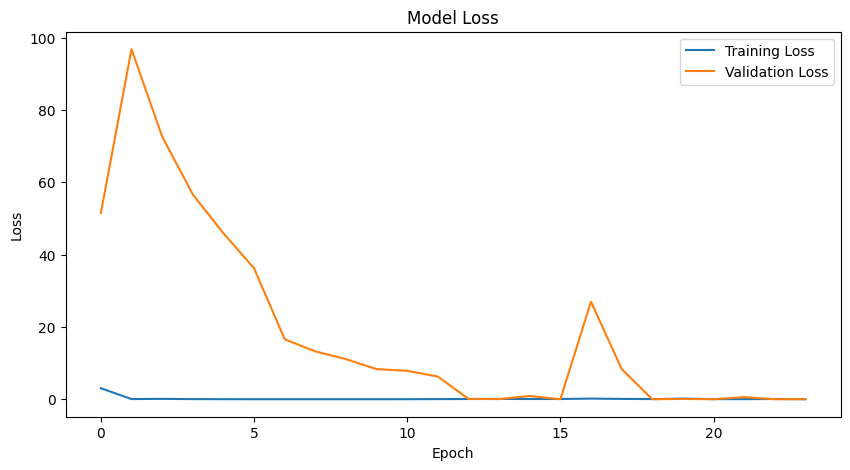

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['Precision'], label='Training Accuracy')
plt.plot(history.history['val_Precision'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


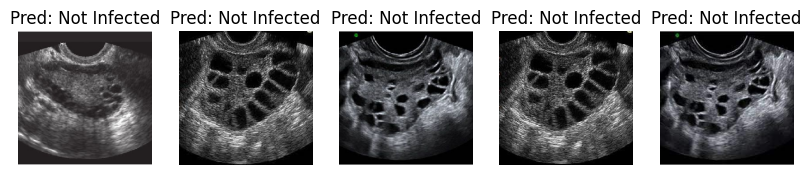

In [24]:
# Load the saved model
from tensorflow.keras.models import load_model
import numpy as np

model = load_model('pcos_detection_model.h5')

# Predict on a single batch
x_batch, y_batch = next(test_generator)

# Predict and print results
predictions = model.predict(x_batch)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"Pred: {'Infected' if predictions[i] > 0.5 else 'Not Infected'}")
    plt.axis('off')
plt.show()
